# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import psycopg2 as pg
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', palette = 'Paired')
#plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
np.set_printoptions(suppress=True) # Suppress scientific notation where possible
from ipywidgets import interactive, FloatSlider

from sklearn.inspection import permutation_importance
from sklearn import linear_model, svm, naive_bayes, neighbors, ensemble
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix,\
roc_auc_score, roc_curve, precision_recall_curve, f1_score, fbeta_score, recall_score,\
precision_recall_fscore_support

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)
from sklearn.metrics import accuracy_score, make_scorer, log_loss

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from mlxtend.plotting import plot_decision_regions

import xgboost as xgb

# Exploratory Data Analysis

In [2]:
# Import dataframe
df = pd.read_csv('/Users/dominguez/Documents/project3/Data/df.csv')

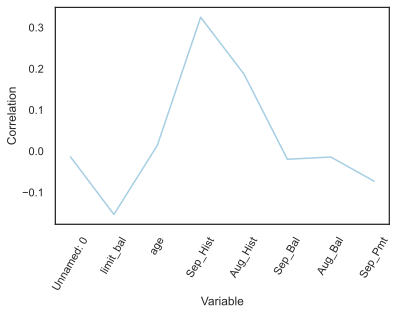

In [4]:
# Visualize Distributions/Correlations
default_corr = df.corr()['Default']

default_corr.drop(['Jul_Hist','Jun_Hist','May_Hist','Apr_Hist',
                   'Jul_Bal','Jun_Bal','May_Bal','Apr_Bal','Jul_Pmt','Jun_Pmt',
                   'May_Pmt','Apr_Pmt','Default'],axis=0, inplace=True)

plt.xticks(rotation=60)
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.plot(default_corr[:-1],);

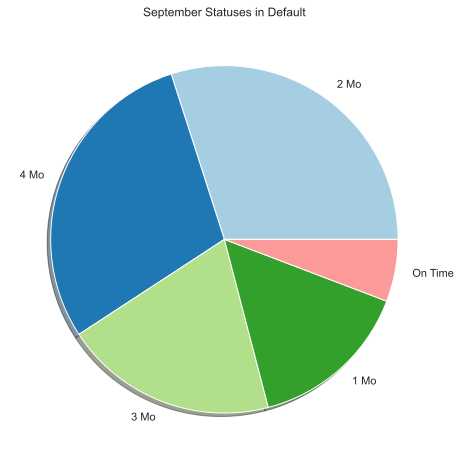

In [5]:
# What is distribution of Monthly History for defaults?

df_d = df[df['Default'] == 1]

sep_hist_list = df_d['Sep_Hist'].value_counts()

# Plot share in pie chart

plt.figure(figsize=(12,8))
plt.title('September Statuses in Default')
plt.pie(sep_hist_list[:5], labels=['2 Mo','4 Mo','3 Mo','1 Mo','On Time'], shadow=True);

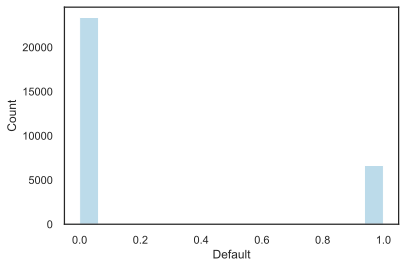

In [6]:
# Distribution of target
sns.histplot(df['Default'], kde=False);

In [7]:
# Imbalanced dataset

In [9]:
sns.pairplot(df[['Default', 'age']], height=4);